<a href="https://colab.research.google.com/github/darshi0301/test1/blob/main/Rice_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving yala_all.xlsx to yala_all.xlsx


In [3]:
import pandas as pd

# Replace 'your_file.xlsx' with the name of your uploaded file
df = pd.read_excel('yala_all.xlsx')

# Display the first few rows of the data
print(df.head())


   Yala Season  Average Yield \n000 Acres Production    Unnamed: 3  \
0          NaN                        NaN    000 Ha.  Bushels/Acre   
1       1952.0                      402.0        163          30.7   
2       1953.0                      366.0        148          27.9   
3       1954.0                      458.0        185         29.95   
4       1955.0                      492.0        199         32.93   

    Unnamed: 4 Unnamed: 5  
0  000 Bushels    000 Mt.  
1        10500        219  
2         8700        182  
3        11800        247  
4        14000        293  


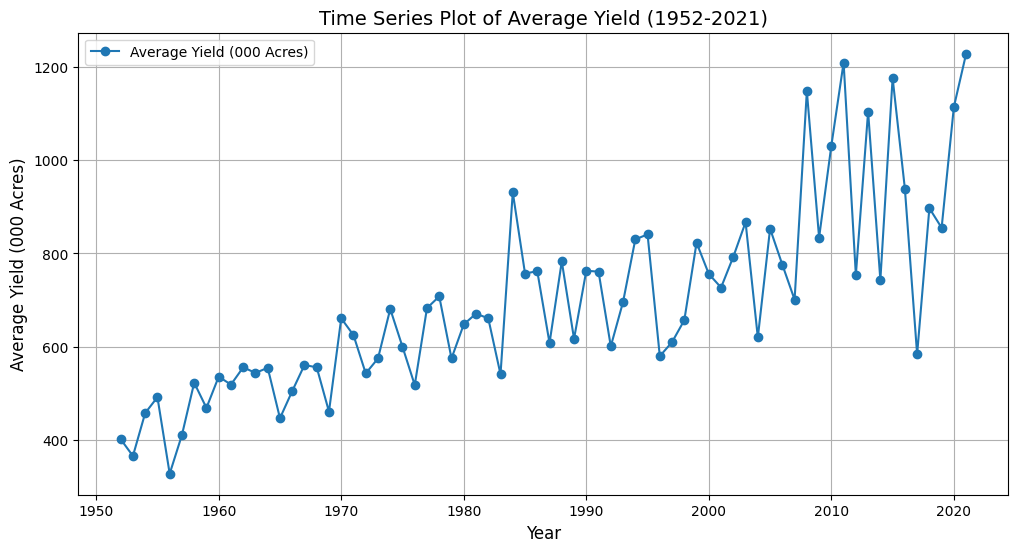

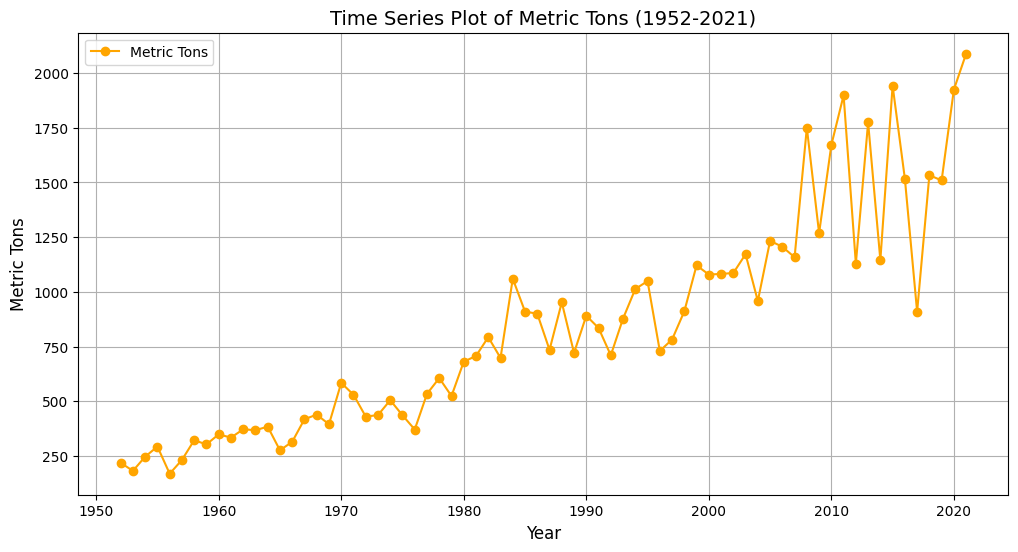

Descriptive Statistics:
              Year  Average_Yield  Production_Ha  Bushels_Acre        Bushels  \
count    70.000000      70.000000      70.000000     70.000000      70.000000   
mean   1986.500000     695.828571     281.614286     59.236429   40173.671429   
std      20.351085     204.573148      82.778085     19.123635   23539.525816   
min    1952.000000     328.000000     133.000000     27.900000    8100.000000   
25%    1969.250000     555.250000     225.000000     41.807500   20156.250000   
50%    1986.500000     661.000000     267.500000     63.475000   36371.000000   
75%    2003.750000     790.500000     320.000000     73.307500   53316.250000   
max    2021.000000    1228.000000     497.000000    100.080000  100080.000000   

       Metric_Tons  
count    70.000000  
mean    838.314286  
std     490.652052  
min     169.000000  
25%     421.000000  
50%     758.500000  
75%    1112.250000  
max    2088.000000  

Stationarity Check for Average Yield:
ADF Statistic: -0.

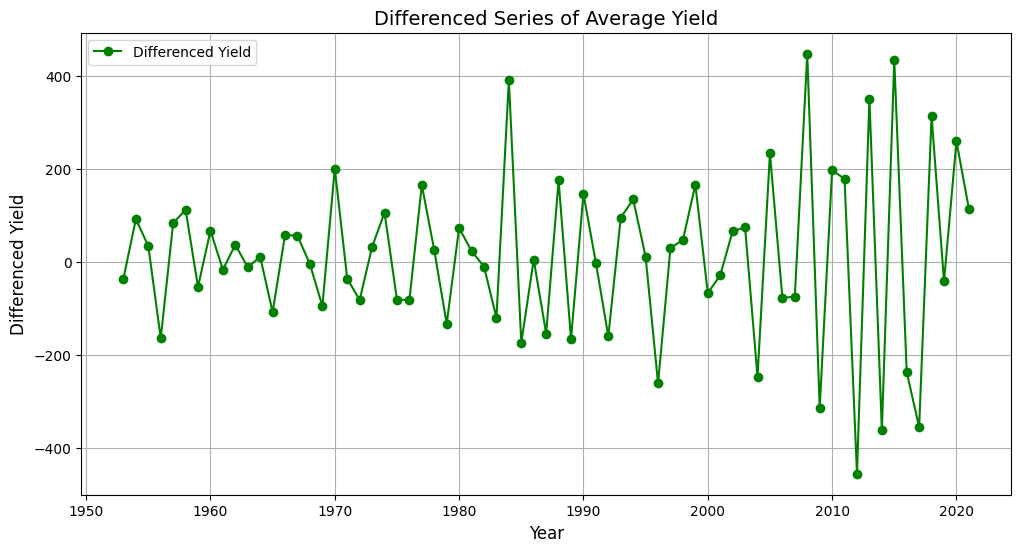

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller



# Rename columns for clarity
df.columns = [
    "Year",
    "Average_Yield",
    "Production_Ha",
    "Bushels_Acre",
    "Bushels",
    "Metric_Tons"
]

# Drop the first row if it contains unit descriptions
df_cleaned = df.iloc[1:]

# Convert relevant columns to numeric
df_cleaned = df_cleaned.astype({
    "Year": float,
    "Average_Yield": float,
    "Production_Ha": float,
    "Bushels_Acre": float,
    "Bushels": float,
    "Metric_Tons": float
})

# Time series plot for Average Yield
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned["Year"], df_cleaned["Average_Yield"], marker='o', label="Average Yield (000 Acres)")
plt.title("Time Series Plot of Average Yield (1952-2021)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Yield (000 Acres)", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Time series plot for Metric Tons
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned["Year"], df_cleaned["Metric_Tons"], marker='o', color='orange', label="Metric Tons")
plt.title("Time Series Plot of Metric Tons (1952-2021)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Metric Tons", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Descriptive Statistics
print("Descriptive Statistics:")
print(df_cleaned.describe())

# Check for stationarity using Augmented Dickey-Fuller test
def check_stationarity(series):
    result = adfuller(series.dropna())
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

# Check stationarity for Average Yield
print("\nStationarity Check for Average Yield:")
check_stationarity(df_cleaned["Average_Yield"])

# Apply first-order differencing if the series is not stationary
df_cleaned["Differenced_Yield"] = df_cleaned["Average_Yield"].diff()

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned["Year"], df_cleaned["Differenced_Yield"], marker='o', color='green', label="Differenced Yield")
plt.title("Differenced Series of Average Yield", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Differenced Yield", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()
